In [1]:
import os
import math
import numpy as np
from matplotlib import pyplot as plt
import time
import torch

testDir = "/home/mrim/quenot/irim/pytorch/dual_encoding_experiments/VisualSearchResults/msrvtt10k/test_results"

In [2]:
def pltscale(scale):
    if scale == 'log':
        plt.xscale('log', base=2)
    else:
        plt.xscale('linear')

def tpca(a, q=65536):
    t0 = time.time()
    a = torch.tensor(a)
    m = a.mean(axis = 0)
    u, s, v = torch.pca_lowrank(a, q=min(a.size(1), q), center=True)
    print(time.time()-t0)
    return m.numpy(), u.numpy(), s.numpy(), v.numpy()

def loadEmbs(testDir, expName, runNum, embsName="embs.pth"):
    runDir = os.path.join(testDir, expName, "runs_%d/model_best" % runNum)
    embs = torch.load(os.path.join(runDir, embsName))
    return embs

def saveEmbs(embs, testDir, expName, runNum, embsName="embs_pca.pth"):
    runDir = os.path.join(testDir, expName, "runs_%d/model_best" % runNum)
    torch.save(embs, os.path.join(runDir, embsName))

In [4]:
embs = loadEmbs(testDir, "latent", 512)
cap = embs['cap_embs']
vid = embs['video_embs']
print(cap.shape, vid.shape)
print(cap, vid)

(59800, 512) (2990, 512)
[[ 0.39110634  1.43794882 -0.03121641 ... -0.93418199  0.45610791
  -0.29712421]
 [ 0.36663842  1.52065277  1.5466547  ... -0.59226125  1.30239141
   1.02058315]
 [-1.29216015  0.13592483  0.37031215 ... -1.15889227  0.50992191
  -0.56953734]
 ...
 [ 0.13224705 -1.60996091 -0.43069291 ...  1.80203712  0.36837974
  -0.36046007]
 [-1.29020751 -1.53876853  2.66403604 ...  0.63881379  0.46087667
   0.72993785]
 [-0.34659535 -0.81407511 -0.48675242 ...  0.16135778 -1.77635014
  -0.65475929]] [[-0.92333651  1.18486524 -0.0824408  ...  0.48224214 -1.73668909
   0.73862302]
 [-1.50339031  2.35628533  2.52961969 ...  0.21534266 -2.16201067
   2.54419041]
 [-0.55641586 -0.07963569 -0.48763624 ...  0.82455045  0.4584035
   0.37426972]
 ...
 [ 1.65009868  0.43012831 -0.88677824 ... -1.86784852  0.64251721
   0.9604525 ]
 [ 0.37845898 -0.14833629 -1.01292658 ... -0.44029036 -0.23265699
  -0.45422807]
 [-0.95087987 -1.4954325   1.79055965 ...  1.25374508 -0.10058445
   0.520

(62790, 11)
0.030297279357910156
(11, 11)
(62790, 16)
0.04649853706359863
(16, 16)
(62790, 22)
0.08291935920715332
(22, 22)
(62790, 32)
0.1272890567779541
(32, 32)
(62790, 45)
0.21462774276733398
(45, 45)
(62790, 64)
0.2927279472351074
(64, 64)
(62790, 90)
0.26177334785461426
(90, 90)
(62790, 128)
0.48198986053466797
(128, 128)
(62790, 181)
0.6973247528076172
(181, 181)
(62790, 256)
1.2427096366882324
(256, 256)
(62790, 362)
1.8497047424316406
(362, 362)
(62790, 512)
6.703769207000732
(512, 512)
(62790, 724)
7.031565427780151
(724, 724)
(62790, 1024)
14.346607685089111
(1024, 1024)
(62790, 1448)
21.108227252960205
(1448, 1448)
(62790, 2048)
36.428083181381226
(2048, 2048)
(62790, 2896)
65.10235500335693
(2896, 2896)
(62790, 4096)
139.16815900802612
(4096, 4096)


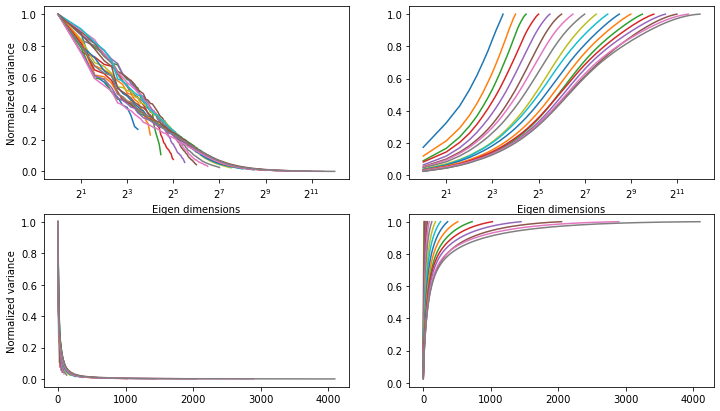

In [10]:
dims = (2**np.linspace(3, 12, num=19)).astype(int)

fig, axes = plt.subplots(2, 2, figsize=(12, 7))
for j in range(2):
    axes[0][j].set_xscale("log", base=2)
    axes[0][j].set_xlabel("Eigen dimensions")
for i in range(2):
    axes[i][0].set_ylabel("Normalized variance")
for dim in dims[1:]:
    embs = loadEmbs(testDir, "latent", dim)
    capvid = embs['cap_embs']
    for i in range(1):
        capvid = np.concatenate((capvid, embs['video_embs']))
    print(capvid.shape)
    m, u, s, v = tpca(capvid)
    print(v.shape)
    embs['video_embs'] = np.matmul(embs['video_embs'],v)
    embs['cap_embs'] = np.matmul(embs['cap_embs'],v)
    saveEmbs(embs, testDir, "latent", dim)
    axes[0][0].plot(range(1,dim+1),np.square(s)/np.square(s).max())
    axes[0][1].plot(range(1,dim+1),np.cumsum(np.square(s))/np.sum(np.square(s)))
    axes[1][0].plot(range(1,dim+1),np.square(s)/np.square(s).max())
    axes[1][1].plot(range(1,dim+1),np.cumsum(np.square(s))/np.sum(np.square(s)))
plt.savefig("PCA-var.pdf", format="pdf", bbox_inches="tight")

In [6]:
for i in dims[1:]:
    for j in dims:
        if j <= i:
            print("do_all_test_latent_load.sh 2048 512", i, j)

do_all_test_latent_load.sh 2048 512 11 8
do_all_test_latent_load.sh 2048 512 11 11
do_all_test_latent_load.sh 2048 512 16 8
do_all_test_latent_load.sh 2048 512 16 11
do_all_test_latent_load.sh 2048 512 16 16
do_all_test_latent_load.sh 2048 512 22 8
do_all_test_latent_load.sh 2048 512 22 11
do_all_test_latent_load.sh 2048 512 22 16
do_all_test_latent_load.sh 2048 512 22 22
do_all_test_latent_load.sh 2048 512 32 8
do_all_test_latent_load.sh 2048 512 32 11
do_all_test_latent_load.sh 2048 512 32 16
do_all_test_latent_load.sh 2048 512 32 22
do_all_test_latent_load.sh 2048 512 32 32
do_all_test_latent_load.sh 2048 512 45 8
do_all_test_latent_load.sh 2048 512 45 11
do_all_test_latent_load.sh 2048 512 45 16
do_all_test_latent_load.sh 2048 512 45 22
do_all_test_latent_load.sh 2048 512 45 32
do_all_test_latent_load.sh 2048 512 45 45
do_all_test_latent_load.sh 2048 512 64 8
do_all_test_latent_load.sh 2048 512 64 11
do_all_test_latent_load.sh 2048 512 64 16
do_all_test_latent_load.sh 2048 512 64 2

In [ ]:
t0 = time.time()
vid, cap = [], []
nr = 20
for n in range(nr):
    runDir = os.path.join(testDir,"latent_2048_pca/runs_%d/model_best" % n)
    embs = torch.load(os.path.join(runDir,"embs.pth"))
    vid.append(torch.tensor(embs['video_embs']))
    cap.append(torch.tensor(embs['cap_embs']))
vid = torch.cat(vid,dim=1)/math.sqrt(nr)
cap = torch.cat(cap,dim=1)/math.sqrt(nr)
vc = [cap]
for i in range(1):
    vc.append(vid)
# vid = vid/vid.square().sum(axis=1).sqrt().unsqueeze(1)
# cap = cap/cap.square().sum(axis=1).sqrt().unsqueeze(1)
vc = torch.cat(vc, dim=0)
print(time.time()-t0)

In [ ]:
t0 = time.time()
q = min(vc.size(1), 4096)
m = vc.mean(axis = 0)
u, s, v = torch.pca_lowrank(vc, q=q, center=True)
print(time.time()-t0)

In [ ]:
scale = 'linear'
q = 4096
pltscale(scale)
plt.plot(range(1,q+1),(s.square().numpy()/s.square().max()))
plt.show()
pltscale(scale)
plt.plot(range(1,q+1),(np.cumsum(s.square().numpy())/np.sum(s.square().numpy()))[:q])
plt.show()

In [ ]:
q = 4096
print(vc.size(1), q)
rvid = (torch.matmul(vid, v))[:,:q]
rcap = (torch.matmul(cap, v))[:,:q]
# rvid = rvid/rvid.square().sum(axis=1).sqrt().unsqueeze(1)
# rcap = rcap/rcap.square().sum(axis=1).sqrt().unsqueeze(1)
rvc = (torch.matmul(vc-m, v))[:,:q]
pltscale(scale)
ev = (torch.cumsum(rvc.square().sum(dim=0),dim=0)/(vc-m).square().sum())[:q]
print(ev[-1].item())
plt.plot(range(1,q+1),ev.numpy())
plt.show()

In [ ]:
save_embs = "embs_fuse_%d_%d.pth" % (nr, q)
print(save_embs)
runDir = os.path.join(testDir,"latent_2048_pca/runs_0/model_best")
torch.save({'video_embs': rvid.numpy(), 'video_tag_scores': None,
            'cap_embs': rcap.numpy(), 'cap_tag_scores': None,}, os.path.join(runDir, save_embs))